# **Getting Started with Image Preprocessing in Python** 
This notebook is contributed for the community by Rimmel Asghar

In [1]:
#importing required Libraries
import numpy as np
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import skimage
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline


Image data processing is one of the most under-explored problems in the data science community. Every developer has a unique way of doing it. Some of the tools and platforms used in image preprocessing include Python, Pytorch, OpenCV, Keras, Tensorflow, and Pillow.

## Introduction

When building a machine learning/computer vision project, one thing we always need is data. In this case, image data.
Unfortunately, a few problems associated with image data include complexity, inaccuracy, and inadequacy. This is why before building a computer vision model, it is essential that the data is preprocessed (cleaned and processed to the desired format) to achieve the desired results.
In this tutorial, we shall be looking at image data preprocessing, which converts image data into a form that allows machine learning algorithms to solve it.
It is often used to increase a model’s accuracy, as well as reduce its complexity.
There are several techniques used to preprocess image data. 
Examples include; 

1. image resizing
2. converting images to grayscale
3. image augmentation.

In [2]:
import os
dataset_pth = '/kaggle/input/animals10/raw-img/'

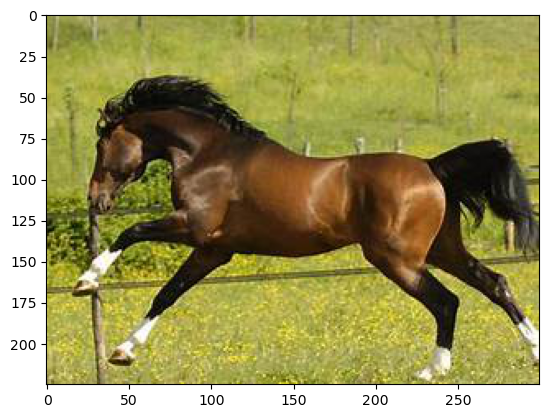

In [3]:
# accessing an image file from the dataset classes
image = io.imread('/kaggle/input/animals10/raw-img/cavallo/OIP---MGqQIhmz3OEPYP-46_xwHaFj.jpeg')  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)


## Data Preprocessing

Now that we’re done with importing libraries and data, let’s proceed to data preprocessing.

Since images exist in different formats, i.e., natural, fake, grayscale, etc., we need to take into consideration and standardize them before feeding them into a neural network.

In this tutorial, we shall look at the following image preprocessing techniques:

*     Grayscale conversion
*     Normalisation
*     Data Augmentation
*     Image standardization

Before we start exploring preprocessing techniques, let’s first explore the RGB channels of our original image;

Text(0.5, 0.98, 'Original & RGB image channels')

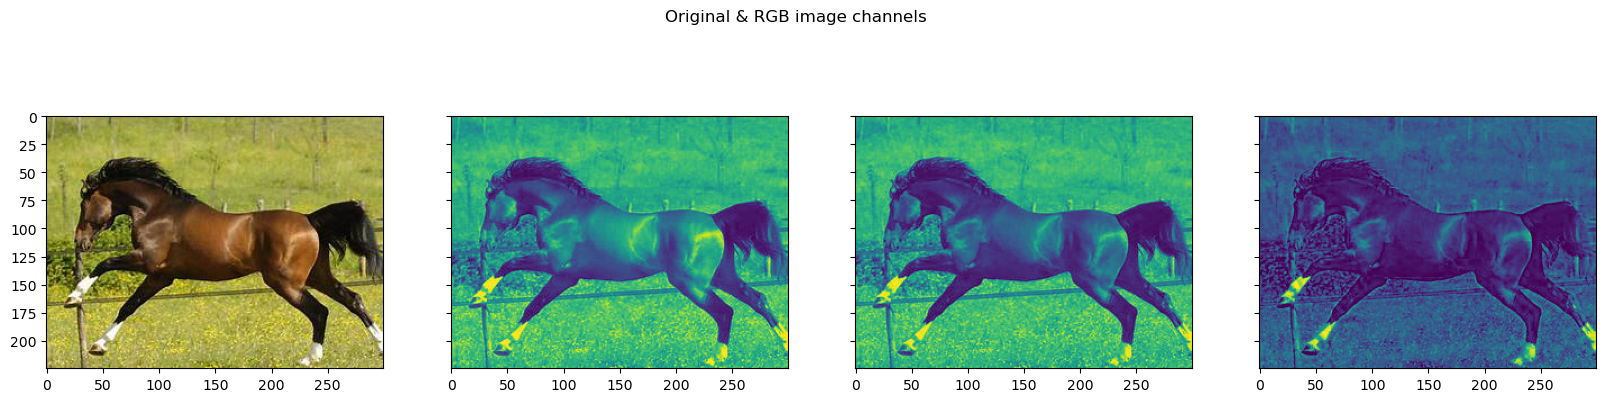

In [4]:
# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

## Grayscale conversion

Grayscale is simply converting images from colored to black and white. It is normally used to reduce computation complexity in machine learning algorithms.

Since most pictures don’t need color to be recognized, it is wise to use grayscale, which reduces the number of pixels in an image, thus, reducing the computations required.

Execute the code below to convert the original image to grayscale:

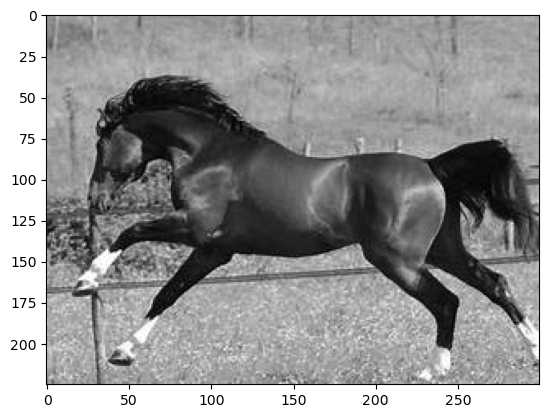

In [5]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

## Normalization

Also referred to as data re-scaling, it is the process of projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1)). This is commonly used on different data formats, and you want to normalize all of them to apply the same algorithms over them.

Normalization is usually applied to convert an image’s pixel values to a typical or more familiar sense.

Its benefits include:

* Fairness across all images - For example, scaling all images to an equal range of [0,1] or [-1,1] allows all images to contribute equally to the total loss rather than when other images have high and low pixels ranges give strong and weak loss, respectively.

* Provides a standard learning rate - Since high pixel images require a low learning rate and low pixel images high learning rate, re-scaling helps provide a standard learning rate for all images.

Let’s write the code below to normalize our data.

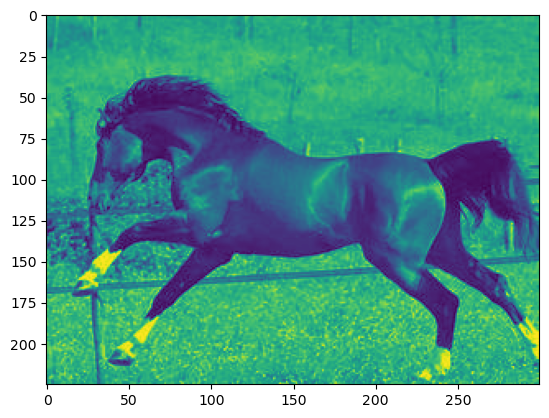

In [6]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

## Data augmentation

Data augmentation is the process of making minor alterations to existing data to increase its diversity without collecting new data.

It is a technique used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

Performing data augmentation helps in preventing a neural network from learning irrelevant features. This results in better model performance.

Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

There are two types of augmentation:

* Offline augmentation - Used for small datasets. It is applied in the data preprocessing step. We will be covering this augmentation in this tutorial.

* Online augmentation- Used for large datasets. It is normally applied in real-time.

For this tutorial, we shall use Keras’s ImageDataGenerator class to augment our data. This is because it provides a quick and easy way to augment your images.

In addition, it supports augmentation techniques such as flips, rotations, brightness change, etc.

Let’s now look at the most used data augmentation techniques:

### Shifting

This is the process of shifting image pixels horizontally or vertically.

Let’s look at an example below that shifts horizontally:


In [7]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00


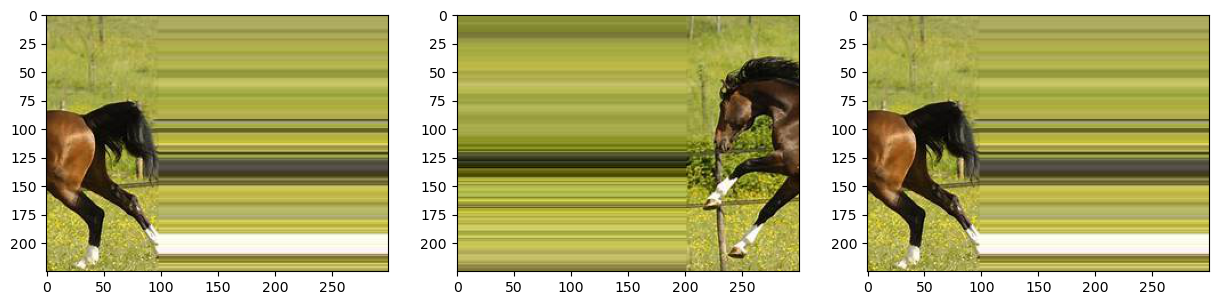

In [8]:
# import libraries

from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 


### Flipping

This reverses the rows or columns of pixels in either vertical or horizontal cases, respectively.

Let’s do a random flip with both horizontal and vertical flips. From the code above, change the ImageDataGenerator parameters as shown below:




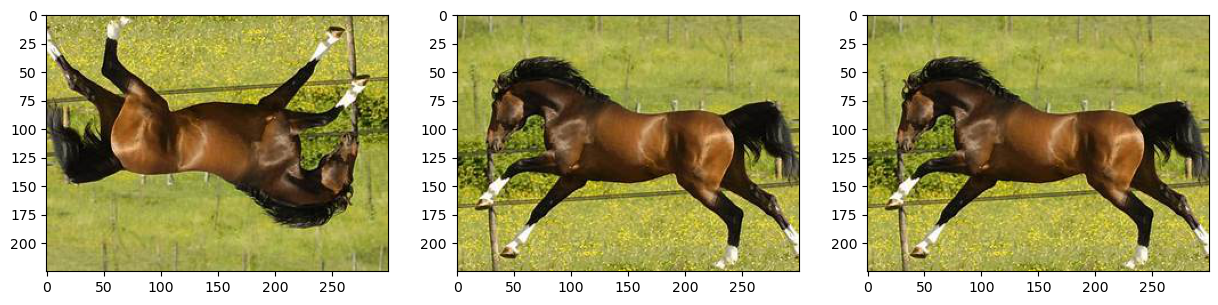

In [9]:
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

### Rotation

This process involves rotating an image by a specified degree.

From the code above, change the ImageDataGenerator parameters, as shown below:

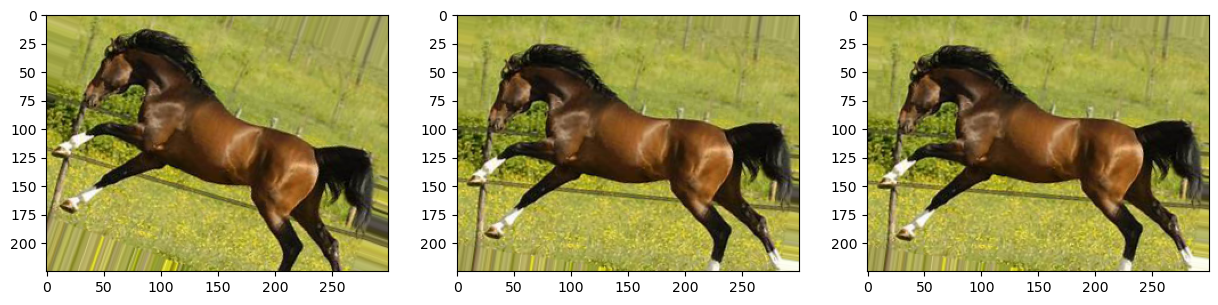

In [10]:
# ImageDataGenerator for rotation
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

### Changing brightness

This is the process of increasing or decreasing image contrast.

From the code above, change the ImageDataGenerator parameters, as shown below:

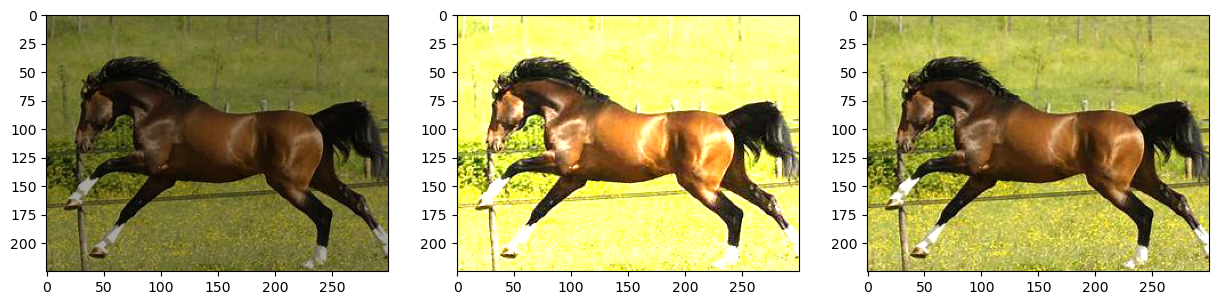

In [11]:
# ImageDataGenerator for brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

### Standardizing images

Standardization is a method that scales and preprocesses images to have similar heights and widths. It re-scales data to have a standard deviation of 1 (unit variance) and a mean of 0.

Standardization helps to improve the quality and consistency of data.

From the code above, change the ImageDataGenerator parameters as shown below:

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


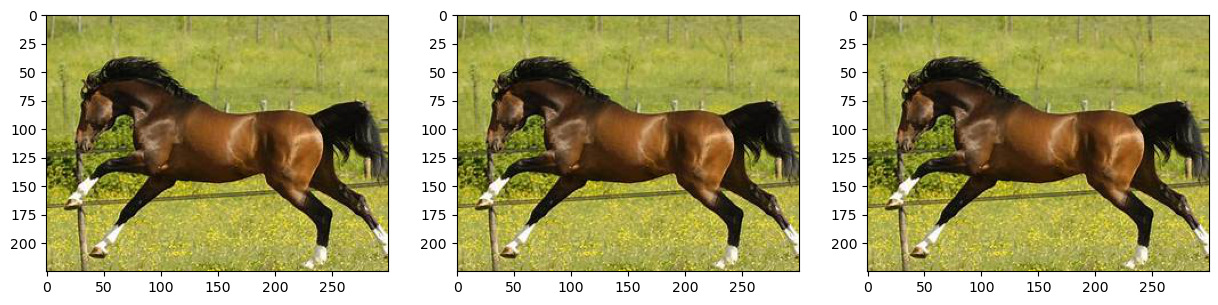

In [12]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

# Conclusion

Having explored the popular and commonly used image preprocessing techniques, what now remains is modeling your machine learning models to the desired level of high accuracy and performance. Thus, we are now ready to jump into building custom computer vision projects.

Good luck!

**Support this NoteBook by UpVote the NoteBook 
This noteBook Will be further Updated with latest industry Trends**